## **Artificial Neural Network Practice**
---
##### **Hi! In this session, I'll practice the Artificial Neural Network concept for the cars price prediction based on given dataset obtained from Kaggle**
---

> Full Name : I Gede Bagus Jayendra

> NIM : 5311422096
---






***Before we proceed with the results, we need to be aware that there are several important libraries that should be imported before we can start the artificial neural network (ANN) session.***

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate, KFold
from sklearn.tree import DecisionTreeClassifier as DTC, DecisionTreeRegressor as DTR

# **Hey! That was too much code! I'm feeling overwhelmed reading that code section right now! >:(**
---

**Nonetheless, every single library that was imported for this session actually helps us to implement this ANN practice.
So... What is the function of each library that we imported?**

1. numpy (imported as np): It is a library for numerical computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays efficiently.

2. pandas (imported as pd): It is a library for data manipulation and analysis. It provides data structures and functions to efficiently work with structured data, such as data frames, which are similar to tables in a relational database.

3. matplotlib.pyplot (imported as plt): It is a plotting library in Python. It provides a wide variety of functions and classes for creating different types of plots, such as line plots, scatter plots, histograms, etc.

4. seaborn (imported as sns): It is a data visualization library built on top of matplotlib. It provides a high-level interface for creating attractive and informative statistical graphics.

5. sklearn.model_selection.train_test_split: It is a function from the scikit-learn library (imported as sklearn). It is used to split the dataset into training and testing subsets. It shuffles and partitions the data into two separate sets, allowing us to evaluate the performance of a model on unseen data.

6. sklearn.preprocessing.MinMaxScaler: It is a class from scikit-learn used for feature scaling. It scales the input features to a specified range, typically between 0 and 1, by subtracting the minimum value and dividing by the range.

7. tensorflow.keras.models.Sequential: It is a class from the TensorFlow library used to create a sequential model for deep learning. The sequential model allows us to build neural networks by stacking layers on top of each other.

8. tensorflow.keras.layers.Dense: It is a class from TensorFlow used to define a fully connected layer in a neural network. The dense layer is the most common type of layer used in deep learning, where each neuron is connected to every neuron in the previous layer.

9. sklearn.linear_model.LinearRegression: It is a class from scikit-learn used to perform linear regression, a statistical technique for modeling the relationship between a dependent variable and one or more independent variables.

10. sklearn.metrics.r2_score: It is a function from scikit-learn used to calculate the coefficient of determination (R-squared) for regression models. It measures the proportion of the variance in the dependent variable that is predictable from the independent variables.

11. sklearn.metrics - confusion_matrix: The confusion_matrix function is a part of the metrics module in the sklearn (Scikit-learn) library. It is used to compute a confusion matrix, which is a table that summarizes the performance of a classification model.


**Okay, so what is the next step?**

Obviously, we shall import the dataset using:


*   `df = pd.read_csv('your_dataset_directory')`
*   `df.head()`

Remember, you can easily type the file name directly without the directory folder, in condition that YOU PLACE THE FILE ITSELF OUTSIDE THE IDE'S DIRECTORY! (In this case, I placed the file without a folder in Google Colab).


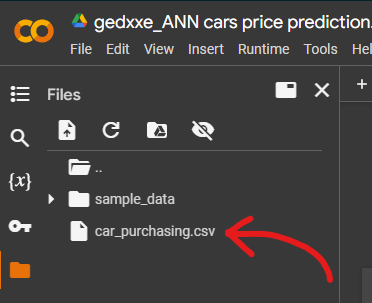

**What does `encoding='ISO-8859-1'` mean? Well, you can usually skip this part, but here is a small information about that.**

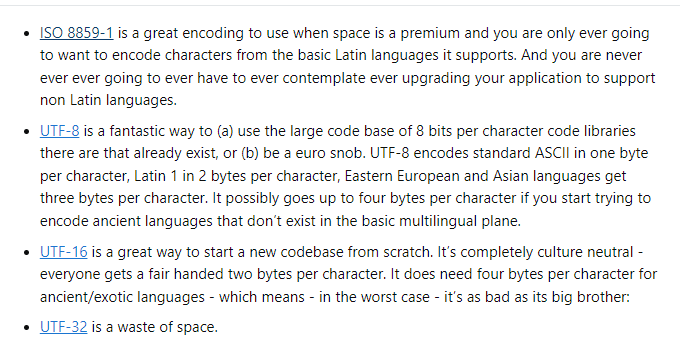

In [18]:
df = pd.read_csv('car_purchasing.csv', encoding='ISO-8859-1')
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


# **What is the actual purpose for the code above?**
That is the main thing  to load a dataset from a CSV file and display the first few rows of the dataset, without dataset load function, we can't jump further to the next step!

Here's a breakdown of what each line of code does:

*   df = pd.read_csv('car_purchasing.csv', encoding='ISO-8859-1'): This line reads

*   a CSV file named "car_purchasing.csv" and creates a pandas DataFrame called df to store the data. The pd.read_csv() function is used to read CSV files, and the encoding='ISO-8859-1' parameter specifies the character encoding of the file.

*   df.head(): This line displays the first few rows of the DataFrame df. The head() function is used to retrieve the first n rows of a DataFrame, and by default, it returns the first 5 rows.

*   The purpose of this code is to load the car purchasing dataset from the CSV file and inspect the initial rows of the dataset to get a glimpse of the data.

In [19]:
df.drop(columns=['customer name', 'customer e-mail', 'country', 'gender'], inplace=True)

# **Wait a second, what else is that???**

Well, the code is used to remove certain columns from a DataFrame.
Here's a breakdown of what each part of the code does:

*   df.drop(columns=...): This is a function call on the DataFrame df using the drop() function. It is used to remove specific columns from the DataFrame.

*   ['customer name', 'customer e-mail', 'country', 'gender']: This is a list of column names that you want to remove from the DataFrame. In this case, the columns named 'customer name', 'customer e-mail', 'country', and 'gender' will be dropped.

*   inplace=True: This parameter is set to True, which means that the DataFrame df will be modified in-place. This ensures that the changes made by dropping the columns are applied directly to the DataFrame df itself.

So, when you execute this code, it will remove the columns 'customer name', 'customer e-mail', 'country', and 'gender' from the DataFrame df. After executing this code, the DataFrame df will no longer contain these columns.
This code is useful when you want to remove unnecessary columns from a DataFrame to simplify the data or prepare it for further analysis or modeling.

In [20]:
df.head()

,age,annual Salary,credit card debt,net worth,car purchase amount
0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


To make our codes clean and tidy, the  ``` # df.head() ``` function is used, but what is the main principles of that function?

The code  is used to display the first few rows of a DataFrame.
*   df.head(): This is a function call on the DataFrame df using the head( function. It is used to retrieve the first few rows of the DataFrame.
By default, the head() function returns the **first 5 rows** of the DataFrame. However, you can specify a different number inside the parentheses to retrieve a different number of rows.

By executing this code, you can see a preview of the data in the DataFrame df. It displays the initial rows of the DataFrame, giving you a quick look at the structure and values of the data.

This is useful for understanding what columns are present in the DataFrame and getting an overview of the data values. It helps in making initial observations and gaining insights about the dataset before further analysis or modeling.

In [21]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  500 non-null    float64
 1   annual Salary        500 non-null    float64
 2   credit card debt     500 non-null    float64
 3   net worth            500 non-null    float64
 4   car purchase amount  500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

The code provided has two parts. Here's what each part does:

*   df.info(): This code displays information about the DataFrame. It provides a summary of the DataFrame's structure, including the number of rows, number of columns, column names, data types of the columns, and the amount of memory used by the DataFrame.
The info() function is useful for obtaining a quick overview of the DataFrame's structure and understanding the data types present in each column. It helps in identifying potential issues such as missing values or incorrect data types.

*   df.isna().sum(): This code checks for missing values in the DataFrame and calculates the count of missing values for each column.
The isna() function examines each element of the DataFrame to determine if it is a missing value (NaN or None). The sum() function then calculates the number of missing values for each column by summing up the True values (1) for missing values.

By executing this code, you can identify which columns have missing values and how many missing values are present in each column. This information is helpful for data cleaning and preprocessing, as missing values may need to be addressed before further analysis or modeling.

# **This is where the fun parts begin!**


---
Now, let's plot the correlation between credit card attribute and annual salary!
In this section, we can use scatter plot to visualize the relationship between two variables in a DataFrame.

Text(0.5, 1.0, 'the corr between credit card debt and annual Salary')

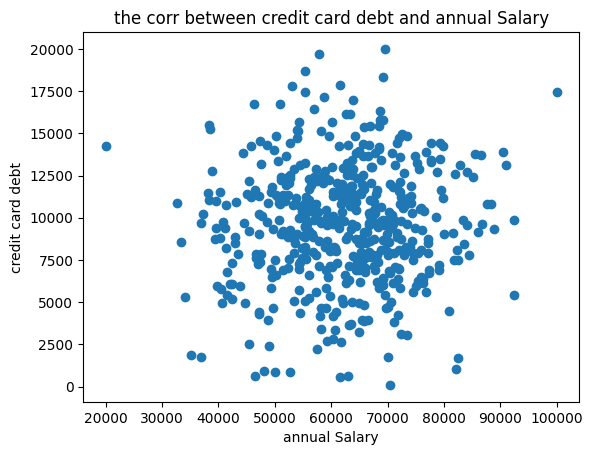

In [22]:
plt.scatter(df['annual Salary'] , df['credit card debt'])
plt.xlabel('annual Salary')
plt.ylabel('credit card debt')
plt.title('the corr between credit card debt and annual Salary')

Here's a breakdown of what each part of the code does for the next step:

*   plt.scatter(df['annual Salary'], df['credit card debt']): This code generates a scatter plot using the scatter() function from the plt module (presumably referring to matplotlib). It plots the values of the 'annual Salary' column from the DataFrame df on the x-axis and the values of the 'credit card debt' column on the y-axis. Each point on the scatter plot represents a specific data point from the DataFrame.

*   plt.xlabel('annual Salary'): This code sets the label for the x-axis of the scatter plot as 'annual Salary'. It helps in identifying what the values on the x-axis represent.

*   plt.ylabel('credit card debt'): This code sets the label for the y-axis of the scatter plot as 'credit card debt'. It helps in identifying what the values on the y-axis represent.

*   plt.title('the corr between credit card debt and annual Salary'): This code sets the title of the scatter plot as 'the corr between credit card debt and annual Salary'. The title provides a brief description of the relationship being visualized.

By executing this code, a scatter plot is generated with 'annual Salary' values on the x-axis, 'credit card debt' values on the y-axis, and a title indicating the correlation between the two variables. This plot helps in understanding the relationship and potential patterns between credit card debt and annual salary.


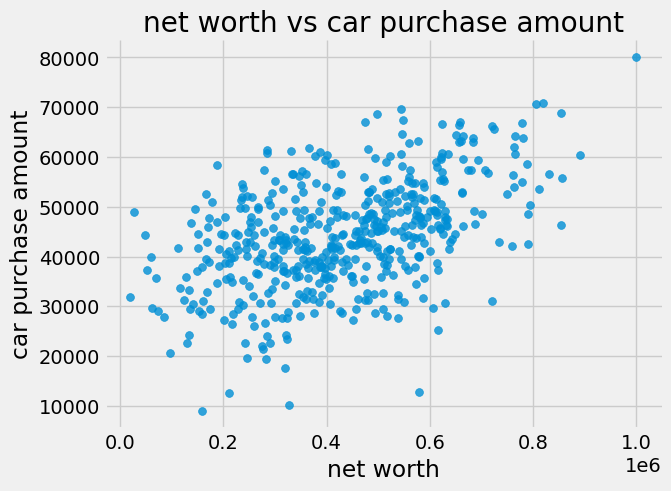

In [90]:
# @title For more clearer examples what is the correlation that can be achieved from this dataset, I will create a new plot with the title of "net worth vs car purchase amount"

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='net worth', y='car purchase amount', s=32, alpha=.8)
plt.title('net worth vs car purchase amount')
plt.gca().spines[['top', 'right',]].set_visible(False)

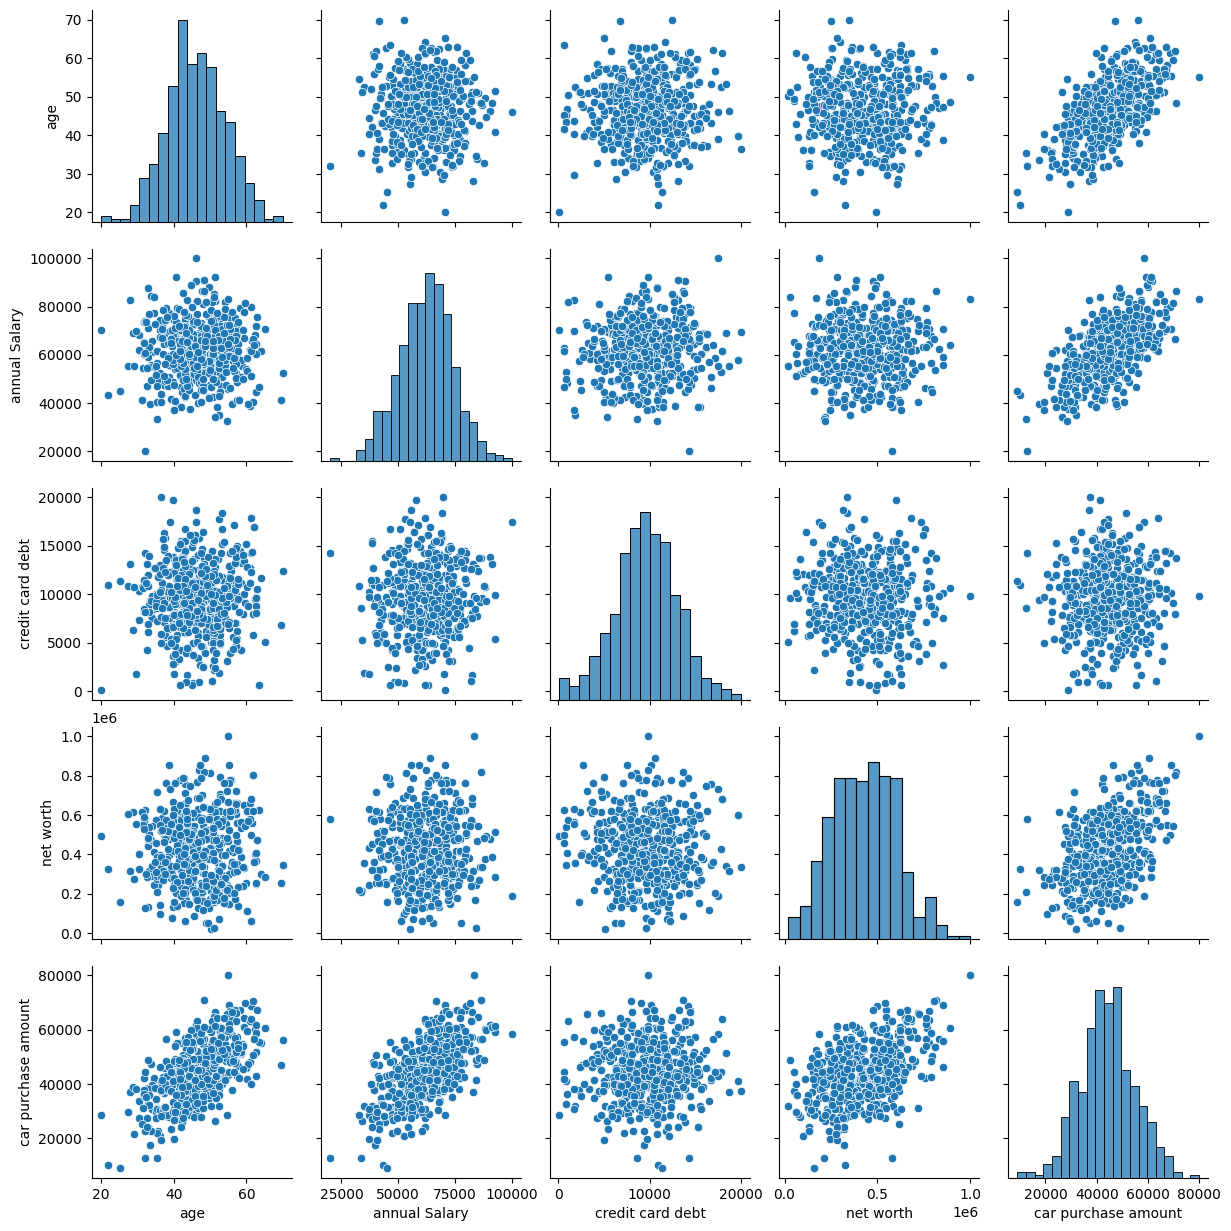

In [23]:
sns.pairplot(df)

# **WoOoW! That's a lot of scatter plot!**


---


FYI, we can create a pairwise scatter plot matrix, also known as a pair plot. Here's a breakdown of what the code does:

*   sns.pairplot(df): This line of code creates a pair plot using the pairplot() function from the seaborn (sns) library. It takes the DataFrame df as input.
A pair plot is a grid of scatter plots where each variable in the DataFrame is plotted against every other variable. It visualizes the pairwise relationships between the variables in the DataFrame. On the diagonal of the grid, instead of scatter plots, it displays histograms or kernel density plots to show the distribution of each variable.

By executing this code, a pair plot is generated, allowing you to examine the relationships between different variables in the DataFrame. It helps in understanding the patterns, correlations, and distributions of the variables all at once.

Pair plots are particularly useful when exploring multivariate datasets and identifying potential relationships or trends between variables.

In [24]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# **Looking for the explanation of these codes? 😮**

*   X = df.iloc[:, :-1]: This code selects a subset of columns from the DataFrame df and assigns it to a new variable X. The iloc function is used to access the DataFrame using integer-based indexing.
In this code, [:, :-1] is used to slice the DataFrame. The : before the comma [,] indicates that we want to select all rows. The :-1 after the comma indicates that we want to select all columns except the last one. So, X will contain all the rows from the DataFrame df, but only the columns except the last column. This operation is commonly used to separate the features or independent variables from the DataFrame.

*   y = df.iloc[:, -1]: This code selects a single column from the DataFrame df and assigns it to a new variable y.
Similar to the previous code, iloc is used for integer-based indexing. Here, [:, -1] is used to select all rows (:) and the last column (-1). So, y will contain all the rows from the DataFrame df, but only the values in the last column. This operation is commonly used to extract the target or dependent variable from the DataFrame.

In conclusion, you separate the features into the variable X and the target variable into the variable y. This separation is often done to prepare the data for machine learning or statistical modeling tasks, where X represents the input data or independent variables, and y represents the corresponding output or dependent variable.

In [25]:
scale = MinMaxScaler()
X = scale.fit_transform(X)
y = scale.fit_transform(y.values.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# **Yippie, another challenging task again! What does it even mean to us?**

*   scale = MinMaxScaler(): This line of code creates an instance of the MinMaxScaler class. The MinMaxScaler is a preprocessing technique used to scale the features of a dataset to a specific range, typically between 0 and 1.

*   X = scale.fit_transform(X): This line of code applies the scaling transformation on the feature variables (X) using the fit_transform() method of the MinMaxScaler. It scales the values of each feature in X to the specified range.

*   y = scale.fit_transform(y.values.reshape(-1, 1)): This line of code applies the scaling transformation on the target variable (y). It first reshapes y into a column vector using values.reshape(-1, 1) and then scales the values of y using the fit_transform() method of the MinMaxScaler.

*   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2): This line of code splits the preprocessed feature variables (X) and the preprocessed target variable (y) into training and testing datasets. It uses the train_test_split() function from a library, likely scikit-learn, to randomly split the data.

*   The test_size=.2 argument specifies that 20% of the data will be used for testing, and the remaining 80% will be used for training. The function returns four datasets: X_train (training features), X_test (testing features), y_train (training target), and y_test (testing target).

Nonetheless, the feature variables (X) and the target variable (y) are scaled using the MinMaxScaler, and then the data is split into training and testing datasets. This preprocessing step is commonly done in machine learning workflows to ensure that the features are on a similar scale and to create separate datasets for training and evaluating models.

In [26]:
#Trying linear regression
lreg = LinearRegression()
lreg.fit(X_train, y_train)
print('Train score', lreg.score(X_train, y_train))
print('Test score', lreg.score(X_test, y_test))

Train score 0.9999999811853658
Test score 0.9999999806050762


Back to linear regression, we can use the machine learning algorithm for predicting continuous outcomes. Each part of the code has some several functions, such as:

*   lreg = LinearRegression(): This line of code creates an instance of the LinearRegression class, which represents the linear regression model. The LinearRegression class is typically available in machine learning libraries, such as scikit-learn.

*   lreg.fit(X_train, y_train): This line of code fits the linear regression model to the training data. It trains the model by finding the optimal coefficients or weights that minimize the difference between the predicted values and the actual target values in the training dataset. It takes the feature variables X_train and the corresponding target variable y_train as input.

*   print('Train score', lreg.score(X_train, y_train)): This line of code calculates and prints the training score of the linear regression model. The score() method of the LinearRegression class is used to compute the coefficient of determination (R-squared) for the model on the training data. The R-squared value indicates the proportion of the variance in the target variable that can be explained by the model. Higher R-squared values indicate better model performance.

*   print('Test score', lreg.score(X_test, y_test)): This line of code calculates and prints the test score of the linear regression model. Similar to the previous line, it uses the score() method to calculate the R-squared value for the model on the testing data (X_test and y_test). The test score provides an evaluation of how well the trained model generalizes to new, unseen data.

So, here we can train a linear regression model (lreg) on the training data, and then calculate and print the training score and test score. These scores provide insights into how well the model fits the training data and how well it performs on new, unseen data. Higher scores indicate better model performance.

In [27]:
y_pred = lreg.predict(X_test)

This part of the code uses the trained linear regression model (lreg) to make predictions on the test data (X_test). The predict() method of the linear regression model is used to generate predictions based on the feature variables provided.
We can obtain the predicted values for the target variable using the trained linear regression model. These predicted values are obtained by passing the test feature data (X_test) into the predict() method of the model.

*The y_pred variable can be used for further analysis, evaluation, or comparison with the actual target values (y_test) to assess the performance and accuracy of the linear regression model.*


---



# **BeEeP, BoOoP... 🤖**


---



# **LETS BUILD AND TRAIN THE "Artificial Neural Network (ANN)" MODEL!**


In [28]:
ann = Sequential([Dense(32, activation="relu"),
                 Dense(1, activation='linear')])

ann.compile(optimizer='adam',
            loss='mean_squared_error',
            metrics=['mean_absolute_error'])


history = ann.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
10/10 [==============================] - 2s 44ms/step - loss: 0.0437 - mean_absolute_error: 0.1740 - val_loss: 0.0206 - val_mean_absolute_error: 0.1146
Epoch 2/50
10/10 [==============================] - 0s 11ms/step - loss: 0.0193 - mean_absolute_error: 0.1121 - val_loss: 0.0138 - val_mean_absolute_error: 0.0957
Epoch 3/50
10/10 [==============================] - 0s 9ms/step - loss: 0.0169 - mean_absolute_error: 0.1047 - val_loss: 0.0137 - val_mean_absolute_error: 0.0951
Epoch 4/50
10/10 [==============================] - 0s 9ms/step - loss: 0.0148 - mean_absolute_error: 0.0976 - val_loss: 0.0108 - val_mean_absolute_error: 0.0838
Epoch 5/50
10/10 [==============================] - 0s 9ms/step - loss: 0.0125 - mean_absolute_error: 0.0894 - val_loss: 0.0091 - val_mean_absolute_error: 0.0743
Epoch 6/50
10/10 [==============================] - 0s 9ms/step - loss: 0.0107 - mean_absolute_error: 0.0827 - val_loss: 0.0075 - val_mean_absolute_error: 0.0668
Epoch 7/50
10/10 [========

## **With the help of the Keras library, here's what each part of the code does:**

*   ann = Sequential([Dense(32, activation="relu"), Dense(1, activation='linear')]): This line of code creates an instance of the Sequential class, which represents a sequential model in Keras. Inside the Sequential model, two Dense layers are defined.
The first Dense layer has 32 units/neurons and uses the ReLU activation function (activation="relu").
The second Dense layer has 1 unit/neuron and uses the linear activation function (activation='linear').
In summary, this defines a simple feedforward neural network with two fully connected layers.

*   ann.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error']): This line of code compiles the ANN model. It specifies the optimizer, loss function, and metrics to be used during the training process.
optimizer='adam' specifies the Adam optimizer, which is a popular optimization algorithm for training neural networks.
loss='mean_squared_error' specifies the mean squared error as the loss function, which measures the difference between the predicted and actual values.
metrics=['mean_absolute_error'] specifies that the mean absolute error will be used as a metric to evaluate the model's performance during training.
*   history = ann.fit(X_train, y_train, epochs=50, validation_split=0.2): This line of code trains the ANN model using the training data (X_train and y_train). It specifies the number of epochs (50) and a validation split of 20% (validation_split=0.2) for monitoring the model's performance on a validation set.
The fit() method trains the model by iteratively adjusting the weights to minimize the specified loss function. It returns a history object that contains information about the training process, such as the loss and metric values at each epoch.

By executing this code, you can define the architecture of the ANN model, compile it, and then train it on the training data. The model learns to make predictions based on the input features (X_train) and corresponding target values (y_train), optimizing the weights to minimize the mean squared error. The training progress and performance can be monitored using the history object.


---



# **LET'S PLOT THE GRAPH!**

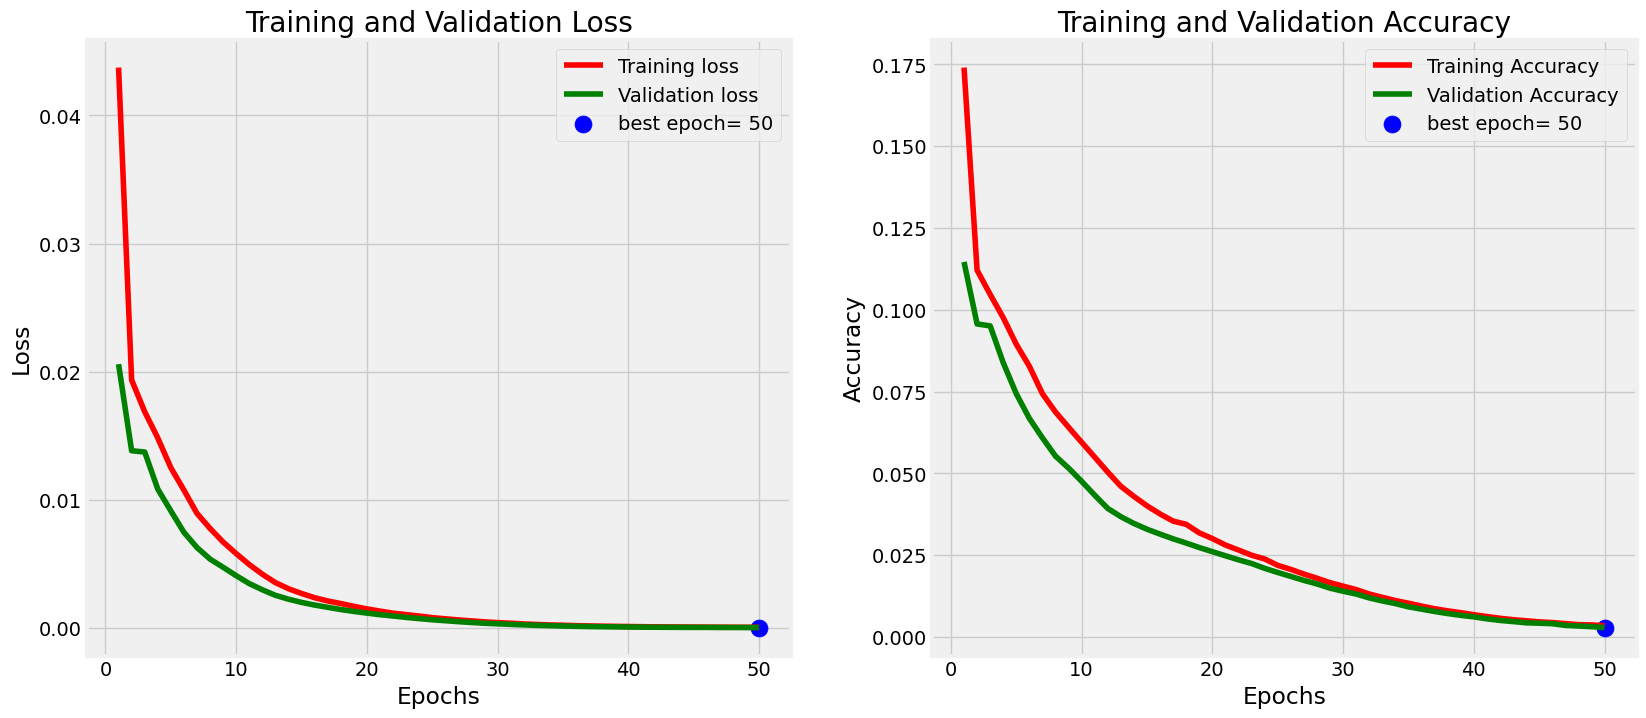

In [29]:
tr_acc = history.history['mean_absolute_error']
tr_loss = history.history['loss']
val_acc = history.history['val_mean_absolute_error']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmin(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

# **Visualizing the training and validation performance of the trained ANN model isn't that hard. But...**

In the context of understanding of each code lines provided in this session, it seems more little tricky when we are dealing with bunch of variables. So I will try to make the explanation is simple as possible. Each part of the code has different purposes, such as:

1. `tr_acc = history.history['mean_absolute_error']`: This line of code extracts the training mean absolute error values from the `history` object and assigns them to the variable `tr_acc`.

2. `tr_loss = history.history['loss']`: This line of code extracts the training loss values from the `history` object and assigns them to the variable `tr_loss`.

3. `val_acc = history.history['val_mean_absolute_error']`: This line of code extracts the validation mean absolute error values from the `history` object and assigns them to the variable `val_acc`.

4. `val_loss = history.history['val_loss']`: This line of code extracts the validation loss values from the `history` object and assigns them to the variable `val_loss`.

5. `index_loss = np.argmin(val_loss)`: This line of code finds the index of the lowest validation loss value using the `argmin()` function from the NumPy library and assigns it to the variable `index_loss`.

6. `val_lowest = val_loss[index_loss]`: This line of code retrieves the lowest validation loss value using the `index_loss` and assigns it to the variable `val_lowest`.

7. `index_acc = np.argmin(val_acc)`: This line of code finds the index of the highest validation mean absolute error value using `argmin()` and assigns it to the variable `index_acc`.

8. `acc_highest = val_acc[index_acc]`: This line of code retrieves the highest validation mean absolute error value using the `index_acc` and assigns it to the variable `acc_highest`.

9. `Epochs = [i+1 for i in range(len(tr_acc))]`: This line of code creates a list of epochs from 1 to the length of `tr_acc` (number of epochs) and assigns it to the variable `Epochs`.

10. `loss_label = f'best epoch= {str(index_loss + 1)}'`: This line of code creates a string that represents the label for the lowest validation loss point in the plot and assigns it to the variable `loss_label`.

11. `acc_label = f'best epoch= {str(index_acc + 1)}'`: This line of code creates a string that represents the label for the highest validation mean absolute error point in the plot and assigns it to the variable `acc_label`.

12. `plt.figure(figsize= (20, 8))`: This line of code creates a figure with a specified size for the plot.

13. `plt.style.use('fivethirtyeight')`: This line of code sets the style of the plot to "fivethirtyeight".

14. `plt.subplot(1, 2, 1)`: This line of code creates a subplot for the first plot (training and validation loss) in a 1x2 grid.

15. `plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')`: This line of code plots the training loss values against the epochs. It uses a red color (`'r'`) and provides a label for the legend.

16. `plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')`: This line of code plots the validation loss values against the epochs. It uses a green color (`'g'`) and provides a label for the legend.

17. `plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)`: This line of code adds a scatter plot marker at the lowest validation loss point. It uses a blue color (`'blue'`), sets the marker size (`s`) to 150, and provides a label for the legend.

18. `plt.title('Training and Validation Loss')`: This line of code sets the title for the first plot as "Training and Validation Loss".

19. `plt.xlabel('Epochs')`: This line of code sets the x-axis label as "Epochs".

20. `plt.ylabel('Loss')`: This line of code sets the y-axis label as "Loss".

21. `plt.legend()`: This line of code displays the legend in the plot.

22. `plt.subplot(1, 2, 2)`: This line of code creates a subplot for the second plot (training and validation accuracy) in a 1x2 grid.

23. `plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')`: This line of code plots the training accuracy values against the epochs. It uses a red color (`'r'`) and provides a label for the legend.

24. `plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')`: This line of code plots the validation accuracy values against the epochs. It uses a green color (`'g'`) and provides a label for the legend.

25. `plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)`: This line of code adds a scatter plot marker at the highest validation mean absolute error point. It uses a blue color (`'blue'`), sets the marker size (`s`) to 150, and provides a label for the legend.

26. `plt.title('Training and Validation Accuracy')`: This line of code sets the title for the second plot as "Training and Validation Accuracy".

27. `plt.xlabel('Epochs')`: This line of code sets the x-axis label as "Epochs".

28. `plt.ylabel('Accuracy')`: This line of code sets the y-axis label as "Accuracy".

29. `plt.legend()`: This line of code displays the legend in the plot.

30. `plt.tight_layout()`: This line of code adjusts the spacing between subplots to avoid overlapping.

31. `plt.show()`: This line of code displays the plot.

Using this code, we can generate a figure with two subplots. The first subplot shows the training and validation loss values over the epochs, with a marker indicating the epoch with the lowest validation loss. The second subplot shows the training and validation accuracy values over the epochs, with a marker indicating the epoch with the highest validation mean absolute error.

This plot helps visualize the training progress and performance of the ANN model, allowing us to identify epochs with the lowest validation loss and highest validation mean absolute error.


---



## **Let's make predictions using the trained ANN model with using:**

1. `ann_y_pred = ann.predict(X_test)`: This line of code predicts the output values for the given input data `X_test` using the trained ANN model and assigns the predicted values to the variable `ann_y_pred`.

- `ann` is the trained ANN model that you defined and trained earlier.
- `X_test` is the input data (features) for which you want to make predictions.

Using the trained ANN model (`ann`) to predict the output values based on the input data (`X_test`), the predicted values are then stored in the variable `ann_y_pred`.

In [30]:
ann_y_pred = ann.predict(X_test)

4/4 [==============================] - 0s 3ms/step




---


# **The next step is evaluating the performance of a regression model using the R-squared (R2) score.**

In [31]:
r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)

R2 score: 0.9999999806050762


## **Here's a few explanations about what the code does:**

1. `r2 = r2_score(y_test, y_pred)`: This line of code calculates the R2 score by comparing the predicted values (`y_pred`) with the actual target values (`y_test`). The R2 score is a statistical measure that represents the proportion of the variance in the dependent variable (target) that is predictable from the independent variables (predictions). The calculated R2 score is assigned to the variable `r2`.

- `y_test` represents the actual target values of the regression problem.
- `y_pred` represents the predicted target values obtained from the regression model.

2. `print('R2 score:', r2)`: This line of code displays the calculated R2 score on the console. The R2 score provides a quantitative measure of how well the regression model fits the actual data. A higher R2 score indicates a better fit, with values ranging from 0 to 1. A score of 1 means the model perfectly predicts the target variable, while a score of 0 means the model does not make any predictions beyond the mean of the target variable.

It will calculate the R2 score to evaluate the performance of the regression model. The R2 score helps assess how well the model captures the underlying patterns and relationships in the data, providing insights into the model's predictive capabilities.


---



# **Let's evaluating the performance of a trained ANN model on a test dataset!**

In [32]:
ann.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 2.3003e-05 - mean_absolute_error: 0.0025


[2.3003151000011712e-05, 0.0025296329986304045]

## **Here's what the code does:**

1. `ann.evaluate(X_test, y_test)`: This line of code evaluates the performance of the trained ANN model by calculating the loss and metrics (e.g., accuracy, mean absolute error) on the provided test dataset (`X_test` and `y_test`).

- `X_test` represents the input features of the test dataset.
- `y_test` represents the corresponding target values of the test dataset.

So, we can obtain performance metrics of the trained ANN model on the test dataset. The specific metrics calculated depend on how the model was configured and compiled. Common metrics include loss, accuracy, mean squared error, mean absolute error, etc.

The `evaluate()` function typically returns a list of metric values, such as the loss value and any other specified metrics. These values can be used to assess the performance of the ANN model on unseen data and compare it with other models.


---



# **Let's make the predictions again using a trained ANN model, BUT with the specific input of data point!**

In [33]:
ann.predict([[40, 70000.500, 9550,534000]])

1/1 [==============================] - 0s 40ms/step


array([[77306.09]], dtype=float32)

# **Here's a few explanations about what the code does:**

1. `ann.predict([[40, 70000.500, 9550, 534000]])`: This line of code makes a prediction using the trained ANN model for a specific input data point represented by the list `[[40, 70000.500, 9550, 534000]]`.

- The input data point is represented as a list of values `[40, 70000.500, 9550, 534000]`.
- Each value in the list corresponds to a specific feature of the input data. The order and meaning of the features should be consistent with how the model was trained.

We use the trained ANN model to predict the output value for the given input data point. The model uses the learned patterns and relationships from the training data to provide a prediction based on the provided features.

The result of the `predict()` function call will be the predicted output value for the input data point you provided. The specific interpretation of the predicted value depends on the problem being addressed. For example, if it is a regression problem, the predicted value might represent a numerical quantity. If it is a classification problem, the predicted value might represent a class label or a probability distribution over the classes.


---



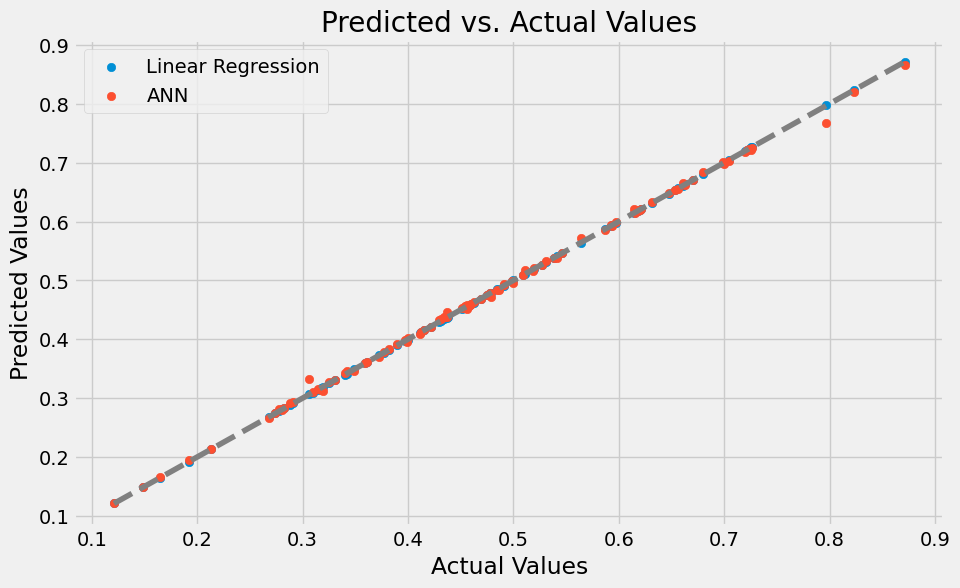

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label='Linear Regression')
plt.scatter(y_test, ann_y_pred, label='ANN')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.legend()
plt.show()

The code above related to visualizing and comparing the predicted values of a linear regression model and an ANN model with the actual values. So the explanation of each lines of code is:

1. `plt.figure(figsize=(10, 6))`: This line of code creates a new figure with a specified size of 10 inches (width) by 6 inches (height). The figure is the canvas on which the plot will be drawn.

2. `plt.scatter(y_test, y_pred, label='Linear Regression')`: This line of code creates a scatter plot of the actual values (`y_test`) against the predicted values (`y_pred`) obtained from a linear regression model. Each point on the plot represents an actual-predicted pair. The `label` parameter assigns a label to the scatter plot, which will be used in the legend.

3. `plt.scatter(y_test, ann_y_pred, label='ANN')`: This line of code creates a scatter plot of the actual values (`y_test`) against the predicted values (`ann_y_pred`) obtained from an ANN model. Similar to the previous line, each point represents an actual-predicted pair, and the `label` parameter assigns a label to this scatter plot.

4. `plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray')`: This line of code creates a diagonal line on the plot, representing the line of perfect predictions. The line connects the points `(min(y_test), min(y_test))` and `(max(y_test), max(y_test))`. The `linestyle` and `color` parameters determine the appearance of the line.

5. `plt.xlabel('Actual Values')`: This line of code sets the label for the x-axis of the plot as "Actual Values".

6. `plt.ylabel('Predicted Values')`: This line of code sets the label for the y-axis of the plot as "Predicted Values".

7. `plt.title('Predicted vs. Actual Values')`: This line of code sets the title of the plot as "Predicted vs. Actual Values".

8. `plt.legend()`: This line of code displays a legend on the plot, representing the labels assigned to the scatter plots.

9. `plt.show()`: This line of code displays the plot on the screen.

In conclusion, we can create a scatter plot that compares the predicted values from a linear regression model and an ANN model with the actual values. This allows us to visually assess how well the models' predictions align with the actual data points. The diagonal line of perfect predictions provides a reference for comparison.

# **LET'S MAKE THE CONFUSION MATRIX!**

#### *Although the confusion matrix section is still in the experimental session, I admit that my results aren't as expected or close to the real results. I apologize for that.*✌🙏

In [38]:
# Convert predictions back to original scale
y_test_orig = scale.inverse_transform(y_test)
y_pred_orig = scale.inverse_transform(y_pred)
ann_y_pred_orig = scale.inverse_transform(ann_y_pred)
# Create confusion matrix
y_test_rounded = np.round(y_test_orig)
y_pred_rounded = np.round(y_pred_orig)
ann_y_pred_rounded = np.round(ann_y_pred_orig)

cm_linear = confusion_matrix(y_test_rounded, y_pred_rounded)
cm_ann = confusion_matrix(y_test_rounded, ann_y_pred_rounded)

## **Let's bring back the predicted values to their original scale and creating confusion matrices for evaluating the performance of the models!**

Here's what the code does:

1. `y_test_orig = scale.inverse_transform(y_test)`: This line of code reverses the scaling transformation applied to the actual target values (`y_test`) using the `scale` object. It converts the scaled values back to their original scale and assigns them to the variable `y_test_orig`.

2. `y_pred_orig = scale.inverse_transform(y_pred)`: This line of code reverses the scaling transformation applied to the predicted values (`y_pred`) obtained from the linear regression model. It converts the scaled predictions back to their original scale and assigns them to the variable `y_pred_orig`.

3. `ann_y_pred_orig = scale.inverse_transform(ann_y_pred)`: This line of code reverses the scaling transformation applied to the predicted values (`ann_y_pred`) obtained from the ANN model. It converts the scaled predictions back to their original scale and assigns them to the variable `ann_y_pred_orig`.

By executing these lines of code, we convert the scaled predictions obtained from the models back to their original scale, allowing for better interpretation and comparison with the actual values.

4. `y_test_rounded = np.round(y_test_orig)`: This line of code rounds the original actual values (`y_test_orig`) to the nearest integer using the `np.round()` function and assigns them to the variable `y_test_rounded`. This is typically done when dealing with classification tasks where the target variable represents discrete class labels.

5. `y_pred_rounded = np.round(y_pred_orig)`: This line of code rounds the original predictions (`y_pred_orig`) obtained from the linear regression model to the nearest integer and assigns them to the variable `y_pred_rounded`.

6. `ann_y_pred_rounded = np.round(ann_y_pred_orig)`: This line of code rounds the original predictions (`ann_y_pred_orig`) obtained from the ANN model to the nearest integer and assigns them to the variable `ann_y_pred_rounded`.

These lines of code are used to convert the original values of the target variable and the predictions to discrete values, typically for classification tasks. This allows for the creation of confusion matrices to evaluate the performance of the models.

7. `cm_linear = confusion_matrix(y_test_rounded, y_pred_rounded)`: This line of code creates a confusion matrix for evaluating the performance of the linear regression model. The `confusion_matrix()` function takes the rounded actual values (`y_test_rounded`) and the rounded predicted values (`y_pred_rounded`) as inputs and calculates the number of true positives, true negatives, false positives, and false negatives.

8. `cm_ann = confusion_matrix(y_test_rounded, ann_y_pred_rounded)`: This line of code creates a confusion matrix for evaluating the performance of the ANN model. It takes the rounded actual values (`y_test_rounded`) and the rounded predicted values (`ann_y_pred_rounded`) as inputs and calculates the number of true positives, true negatives, false positives, and false negatives.

This code converts the scaled predictions back to their original scale, rounds them to discrete values, and creates confusion matrices to evaluate the performance of the linear regression model and the ANN model.



---



# **Let's print the Confusion Matrix!**

In [71]:
print('Confusion Matrix - Linear Regression:')
print(cm_linear)
print('Confusion Matrix - ANN:')
print(cm_ann)

Confusion Matrix - Linear Regression:
[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]
Confusion Matrix - ANN:
[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


# **Let's plot the Confusion Matrix too!**
---



In [81]:
def plot_confusion_matrix(cm_linear, classes,
                        normalize=True,
                        title='Confusion matrix ANN',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm_linear)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)



    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

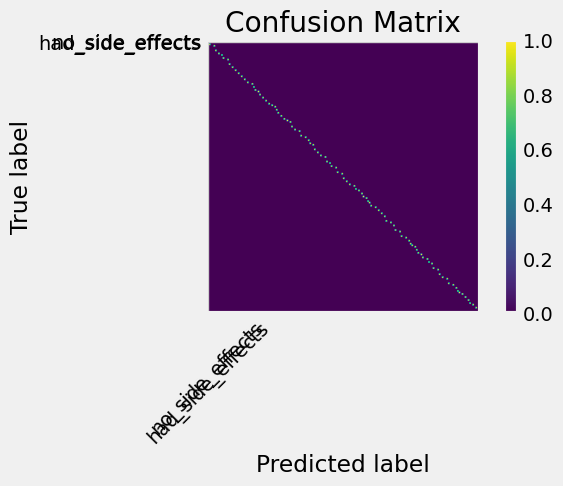

In [82]:
plot_confusion_matrix(cm_linear=cm_linear, classes=cm_plot_labels, title='Confusion Matrix')

---

# **===IGNORE THIS CODE BELOW! FOR EXPERIMENTAL SESSION LOGGING ONLY!===**




---

In [ ]:
# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

In [86]:
from sklearn.metrics import confusion_matrix

expected = [1, 1, 0, 1, 0, 0, 1, 0, 0, 0]
predicted = [1, 0, 0, 1, 0, 0, 1, 1, 1, 0]
results = confusion_matrix(expected, predicted)
print(results)

[[4 2]
 [1 3]]


TypeError: Invalid shape (10,) for image data

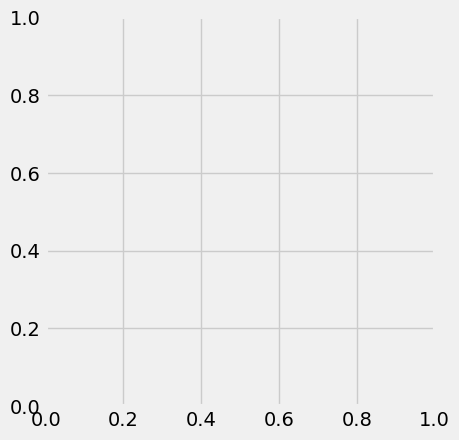

In [87]:
plot_confusion_matrix(expected, predicted)